# Single Components

In this session we will use python to perform some simple component calculations. Doing this we will

- Wrap up what typical components in thermal engineering like
    - Heat exchangers or
    - Compressors

    do,
    
- Transfer analytic calculation to code,
- Visualize component behavior and
- Understand challenges and options related to numerical calculations.

## Heat Exchangers

Heat exchangers are key components of many plants and systems in thermal engineering. They are available in a lot of different designs and can transfer heat from and allmost any fluid. In this course we do not analyse mechanisms and of heat transfer or construction aspects in detail although both are a field of specialization within thermal engineering. What we will focus on is how heat exchangers can be modelled as components that transfer energy from or to fluids that run through bigger thermal engineering systems.     

### Air heater

To start dealing with heat exchangers we consider a device to heat up air. This could generally be done in any kind of heat exchanger. Just to illustrate one construction type the figure below shows a tubular heat exchanger in which heat is transferred from one fluid to another. Plate type heat exchangers are another typical construction form for fluid to fluid heaters an there are many more.

![tubular heat exchanger](img\Tubular_heat_exchanger.png)

To keep it simple at the beginning we only consider the fluid that ist heated up and think if the respective engineering device as some kind of single sided heat exchanger. Additionally  we treat the fluid as a perfect gas. From the last unit we know, this is quite sensible as long as pressures are not too high and temperatures not too low. Last but not least we are going to neglect changes in velocity or height of the air that might occure between entering and leaving the heat exchanger.

Before we start to calculate the component we have to collect suitable equations and idetify which information is needed. The most basic approach to calculate heat flow $\dot Q$ transferred from or to a fluid is
$$
\dot{Q} = \dot {m} \left( h_{out} - h_{in} \right)
$$
and depending on the mass flow $\dot m$ and the difference of specific enthalpies between inlet and outlet which for perfect gases can be calculated using the specific isobaric heat capacity $c_p$
$$
h_{out} - h_{in} = c_p \left(T_{out} - T_{in} \right)
$$
based on the temperature difference of the gas between in- and outlet.

The most obvious approach is to use python to calculate the heat exchanger duty $\dot Q$. This could be a typical task when designing a heat exchanger to heat up a certain mass flow from one temperature to another. A very simple script to determine the respective heat exchanger duty could look like this.   

In [1]:
# ideal gas parameters
c_p = 1100 # specific heat of air in J/(kgK)

# inlet conditions
m_1 = 10 # mass flow in kg/s
t_1 = 293.15 # temperature in K

# outlet conditions
t_2 = 393.15 # temperature in K

# calculate heat exchanger duty in W
q = m_1 * c_p * (t_2 - t_1)

print(q)

1100000.0


Another common situation in thermal engineering could be that operation data is recorded. The data that would be measured most likely would be the temperatures at in- and outlet. If the air is heated up using some kind of direct electrical heater, the duty could also easily be measured. In this case it would be interesting to determine the mass flow of the air as it could be tricky to measure it. A python script to calculate the mass flow neglecting any losses could easily be derived from the script above as just some of the variables and calculations need to be changed.

In [2]:
# ideal gas parameters
c_p = 1100 # specific heat of air in J/(kgK)

# inlet conditions
t_1 = 293.15 # temperature in K

# outlet conditions
t_2 = 393.15 # temperature in K

q = 1000000 # heat exchanger duty in W

# calculate mass flow in kg/s 
m = q / (c_p * (t_2 - t_1))

print(m)


9.090909090909092


Finally a question could be to what temeperature a certain mass flow could be heated up with a given heat flow. Again, it is more or less a question of basic mathematics to code a script to calculate the outlet temperature instead of duty or mass flow.

In [3]:
# ideal gas parameters
c_p = 1100 # specific heat of air in J/(kgK)

# inlet conditions
m_1 = 10 # mass flow in kg/s 
t_1 = 293.15 # temperature in K

# outlet conditions

q = 1000000 # heat exchanger duty in W

# calculate outlet temperature in K 
t_2 = t_1 + q / (m_1 * c_p)

print(t_2)


384.05909090909086


To check how the assuption that the air could be treated as an ideal gas affects the results we now switch medium to pressureless but real gas air. As a consequence both the set of equations and the scripts have to be revised. The new script for calculating the duty is quite simlilar to the respective approach for ideal gases as one could see here.

In [4]:
# properties will be calculated using CoolProp
from CoolProp.CoolProp import PropsSI as prop

# fluid information
fluid = 'air'

# inlet conditions
m_1 = 10 # mass flow in kg/s
t_1 = 293.15 # temperature in K
p_1 = 1 * 10**5 # pressure in Pa

# outlet conditions
t_2 = 393.15 # temperature in K

# clalculate missing properties
h_1 = prop('H', 'P', p_1, 'T', t_1, fluid)
p_2 = p_1
h_2 = prop('H', 'P', p_2, 'T', t_2, fluid)

# claculate duty in W
q = m_1 * (h_2 - h_1)

print(q)


1009032.6831157284


However, to calculate the outlet temperature a different approach is needed the relation between enthalpy an temperature is no longer easy to describe. A respective script for real gases could look like this.

In [5]:
# use CoolProp for property calculations
from CoolProp.CoolProp import PropsSI as prop

# fluid information
fluid = 'air'

# inlet conditions
m_1 = 10 # mass flow in kg/s
t_1 = 293.15 # temperature in K
p_1 = 1 * 10**5 # pressure in Pa

# HX duty
q = 1000000 # heat exchanger duty in W

# calculate missiong conditions
h_1 = prop('H', 'P', p_1, 'T', t_1, fluid)
p_2 = p_1

# calculate outlet temperature in K 
h_2 = h_1 + q / m_1 

t_2 = prop('T', 'P', p_2, 'H', h_2, fluid)

print(t_2)


392.2585721586641


### Steam Condenser

Up to this point we only considered sensible heat to be transferred in a heat exchanger. This holds for many applications in thermal engineering. But there are also some heat exchangers of great relevance in which latent heat is the dominating or even sole effect. One of the most common devices in thermal engineering with condensing fluids is a steam condender. The figure below illustrates a respective apparatus. 

![condenser](img\Condenser.png)

Again, we will consider only one side of this heat exchanger. For our next script we assume that wet steam with a vapour content of 90 % is to be condensed to sasturated liquid. Befo we code a respective script, we have to know that CoolProp uses the letter "Q" for the quality of a two phase mixture. Q is zero for satureted liquid and 1 for saturated gas. So to adapt our script for calculating a heat exchanger duty we have to revise the set of equations a little, but after that the solution is quite straight-forward.

In [6]:
from CoolProp.CoolProp import PropsSI as prop

# fluid information
fluid = 'water'

# inlet conditions
m_1 = 10 # mass flow in kg/s
p_1 = 1 * 10**5 # pressure in Pa
x_1 = 0.9 # steam quality

# outlet conditions
x_2 = 0 # steam quality for complete condensation

# calculate missing properties
h_1 = prop('H', 'P', p_1, 'Q', x_1, fluid)
p_2 = p_1
h_2 = prop('H', 'P', p_2, 'Q', x_2, fluid)

# calculate duty
q = m_1 * (h_2 - h_1)

print(q)

-20316993.899718054


One should not be irritated of the negative result, as the heat is drawn from the steam and not put into it.

## Compressor

Now let's switch to another key component in thermal engineering. The illustration below shows an axial compressor in which for examplr ait could be compressed.

![compressor](img\Axial_compressor.gif)

The symbol to reperesent compressors in heat balace diagrams is shown below. We will use heat balance diagramms to represent a network of components when we turn to more complex processes in later units of this course. For now we continue to focus on single components. 

![compressor heat balance diagramm sysmbol](img\CompressorSymbol.svg)

Our next tasks will refer to the compressor. We instantlystick to air as a working fluid but start treating the air as a real gas from the beginning. Again we have to identify a suitable set of equations to describe the operation of the compressor first. The energy balacing equation is quite similar to what we did before as loong as we assume the compressor to be well isolated, i.e. adiabatic in terms of engineering thermodynamcs.

$$
P = \dot m \left( h_{out} - h_{in} \right) 
$$

For thermodynamic properties we will again use CoolProp so there is nothing new to consider in general concerning the caloric properties. But there is another important thing to consider looking at adiabatic turbomachinery. This is the isentropic efficiency of the component. In case of compressors it is defined as

$$
\eta_s = \frac{\Delta h_s}{\Delta h}
$$

in which $\Delta h_s$ is the isentropic enthalpy difference, i.e. the minimum enthalpy rise that would be needed to lift the working fluid from the compressor's inlet conditions to the outlet pressure. This would be if the specific entropy $s§ at the outlet would not differ from that at the inlet.

When designing a compressor in thermal engineering experienced manufacturers and users typically have an expectation concerning the isentropic efficiency. Although this could be considered some kind of first guess befor starting into detail engineering of the respective turbomachinery the expected efficiency can serve as a starting point for claculating the compressor duty for a given massflow if a working fluid has to be compressed from known inlet conditions to a certain pressure. In combination with its efficiency the compressor's pressure ratio

$$

\Pi_C = \frac{p_{out}}{p_{in}}

$$

defines the performance data of a compressor.

A script to calculate the compressor duty based on this information could be implemented like this.

In [7]:
# use CoopProp for property calculation
from CoolProp.CoolProp import PropsSI as prop

# fluid information
fluid = 'air'

# inlet properties
m_1 = 10 # mass flow in kg/s
p_1 = 1 * 10**5 # pressure in Pa
t_1 = 293.15 # temperature in K

# compressor data
pr = 10 # pressure ratio
eta_c = 0.9 # isentropic efficiency

# calculate missing properties
h_1 = prop('H', 'P', p_1, 'T', t_1, fluid)

# make use of component data
p_2 = p_1 * pr
s_1 = prop('S', 'P', p_1, 'H', h_1, fluid)
h_2s = prop('H', 'P', p_2, 'S', s_1, fluid)
h_2 = h_1 + (h_2s - h_1) / eta_c

# calculate compressor duty
power = m_1 * (h_2 - h_1)

print(power)

3042655.0535690766


It is very simple to adapt the script to calculate the air mass flow as it can be seen below. With measured temperatures at in- and outlet it would be even easier.


In [8]:
# use CoopProp for property calculation
from CoolProp.CoolProp import PropsSI as prop

# fluid information
fluid = 'air'

# inlet properties
p_1 = 1 * 10**5 # pressure in Pa
t_1 = 293.15 # temperature in K

# compressor data
pr = 10 # pressure ratio
eta_c = 0.9 # isentropic efficiency

# compressor duty
power = 10**6 # compressor duty in W

# calculate missing properties
h_1 = prop('H', 'P', p_1, 'T', t_1, fluid)

# make use of component data
p_2 = p_1 * pr
s_1 = prop('S', 'P', p_1, 'H', h_1, fluid)
h_2s = prop('H', 'P', p_2, 'S', s_1, fluid)
h_2 = h_1 + (h_2s - h_1) / eta_c

# calculate mass flow in kg/s
m_1 = power / (h_2 - h_1)

print(m_1)

3.2866032540461205


To determine the outlet temperature instead of the power is very simple. Actually for this not even the mass flow is needed. The outlet temperature can be derived from the above mentioned performance data independently of the scale of the device. Plotting the outlet temperatures for different component data can hence give insights of expectable temperatures for compressors of arbitrary size.

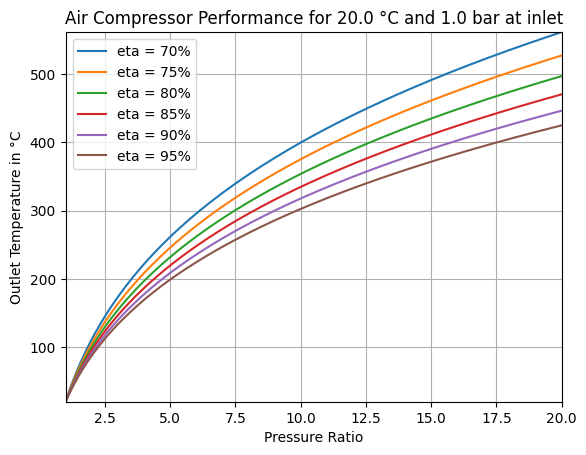

In [9]:
# use CoopProp for properties
from CoolProp.CoolProp import PropsSI as prop 

# use matplotlib for plotting
import matplotlib.pyplot as plt

# use numpy for efficient handling of arrays
import numpy as np


# fluid information
fluid = 'air'

# inlet conditions
m_1 = 10 # mass flow in kg/s
p_1 = 1 * 10 **5 # pressure in Pa
t_1 = 293.15 # temperature in K

# compressor data
pr_min = 1 # minimum pressure ratio
pr_max = 20 # maximum pressure ratio
eta_min = 0.7 # minimum efficiency
eta_max = 0.95 # maximum efficiency

pr_range = np.linspace(pr_min, pr_max, num=200)
eta_range = np.linspace(eta_min, eta_max, num=6)

# calculate maximum outlet temperature
def calc_t2(p_in, h_in, pr, eta, medium):
    '''
    calculates outlet temperature
    '''
    s_in = prop('S', 'P', p_in, 'H', h_in, medium)
    h_out_s = prop('H', 'P', p_in*pr, 'S', s_in, medium)
    h_out = h_in + (h_out_s - h_in) / eta
    return prop('T', 'P', p_in*pr, 'H', h_out, medium)

# calculate missing properties
h_1 = prop('H', 'P', p_1, 'T', t_1, fluid)

# calculate outlet temperature
t_2max = calc_t2(p_1, h_1, pr_max, eta_min, fluid)

t_2 = [calc_t2(p_1, h_1, pr_range, eta_c, fluid) for eta_c in eta_range]

# plot outlet temperatures
fig = plt.figure()
ax = fig.add_subplot(111)
for t in t_2:
    ax.plot(pr_range, t-273.15)
ax.set_ylabel('Outlet Temperature in °C')
ax.set_ylim(t_1-273.15, t_2max-273.15)
ax.set_xlabel('Pressure Ratio')
ax.set_xlim(pr_min, pr_max)
ax.grid(True)
labels = [f'eta = {(eta):2.0%}' for eta in eta_range]
ax.legend(labels)
ax.set_title(f'Air Compressor Performance for {t_1-273.15} °C and {p_1/10**5} bar at inlet' )
plt.show()


To determine the compressor pressure ratio that leads to a temperature of 300°C at the compressed air outlet with an efficiency of 90 %, however, is not that easy. As soon as the working fluid can not be described using very equations of state, the script cannot be reversed by just doing some maths on the basic equations. Of course it is still possible to find the solution. Maybe this is the first time it turns out that using python (or any other programming language) is not just nice to have, but realy a facilating engineering aproach to solve a respective problem with reasonable effort.  

In [10]:
# use CoolProp
from CoolProp.CoolProp import PropsSI as props

# fluid information
fluid = 'air'

# inlet conditions
m_1 = 10 # mass flow in kg/s
p_1 = 1 * 10**5 # inlet pressure in Pa
t_1 = 293.15 #inlet temperature in K

# compressor data
eta_c = 0.9 # compressor isentropic efficiency
pr_min = 1 # minimum pressure ratio
pr_max = 20 # maximum pressure ratio

# outlet conditions
t_2_target = 573.15 # target compressor outlet tempertature in K


# calculate missing properties
h_1 = props('H', 'P', p_1, 'T', t_1, fluid)
s_1 = props('S', 'P', p_1, 'H', h_1, fluid)

# calculate outlet temperature
def calc_t_out_pr(pr, eta, p_in, h_in, medium):
    '''
    function for calculating outlet temperatures 
    as a function of pressure ratio
    '''
    s_in = props('S', 'P', p_in, 'H', h_in, medium)
    h_out_s = props('H', 'P', p_in*pr, 'S', s_in, medium)
    h_out = h_in + (h_out_s - h_in) / eta
    t_out = props('T', 'P', p_in*pr, 'H', h_out, medium)
    return t_out

t_2_min = calc_t_out_pr(pr_min, eta_c, p_1, h_1, fluid)
t_2_max = calc_t_out_pr(pr_max, eta_c, p_1, h_1, fluid)

print(t_2_min)
print(t_2_target)
print(t_2_max)

# find pressure ratio for target outlet temperature
if (t_2_min < t_2_target) and (t_2_target < t_2_max):
    print('feasible')
    # define search area
    pr_low = pr_min
    pr_high = pr_max
    t_low = t_2_min
    t_high = t_2_max
    pr_found = False
    # bi-sectional search
    while not pr_found:
        # print(f'searching, pressure ratio is between {pr_low} and {pr_high}')
        pr_new = (pr_low + pr_high)/2
        t_new = calc_t_out_pr(pr_new, eta_c, p_1, h_1, fluid)
        if t_new > t_2_target:
            pr_high = pr_new
        elif t_new < t_2_target:
            pr_low = pr_new
        else:
            pr_low = pr_new
        pr_found = abs(t_new - t_2_target) < 0.001
else:
    print('out of range')

# print('done')
print(pr_new)

293.1499999999991
573.15
719.5889839177461
feasible
9.005332946777344


You may notice that bisectional search, i.e. a very robust algorithm, has been chosen in the example above to find the solution iteratively. Other algorithms would also be possible.

## Next Steps

In the next unit we will try to generalize how typical problems in thermal engineering can be solved using numerical methods. To prepare for that you can try to find out what information is needed to calculate arbitraty components in thermal engineering with one inlet and one outlet. Additionally, you should wrap up some basics concerning numerical methods, especially for zero search and ways to solve not just one but a set of equations.

To train and maybe reactivate your know-how on basic components you could also consider other typical devices, like throttles or steam turbines in a similar way as to we looked at heat exchangers or compressors in this unit.